# Preprocessing

In [1]:
# import torch
from torchvision import datasets, transforms
from torchvision.io import read_image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from data_preparation import spliting_image, resize

## Import images

In [2]:
# transform = transforms.Compose([transforms.Resize(255),
#                                  transforms.CenterCrop(224),
#                                  transforms.ToTensor()])

# dataset = datasets.ImageFolder('../data/Paris_satellite/', transform=transform)

In [2]:
X, y = spliting_image("../data/Paris_plan/")

In [3]:
# !ls ../data/Paris_plan/

In [3]:
X[0].shape

torch.Size([3, 512, 512])

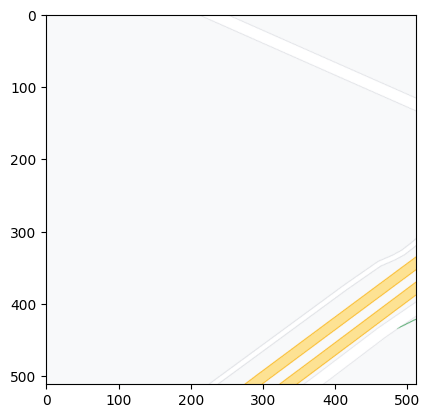

In [4]:
plt.imshow(X[0].permute(1,2,0));

In [25]:
test = resize(X,1.2)
test

[tensor([[[248, 248, 248,  ..., 248, 248, 248],
          [248, 248, 248,  ..., 248, 248, 248],
          [248, 248, 248,  ..., 248, 248, 248],
          ...,
          [248, 248, 248,  ..., 248, 248, 248],
          [248, 248, 248,  ..., 248, 248, 248],
          [248, 248, 248,  ..., 248, 248, 248]],
 
         [[249, 249, 249,  ..., 249, 249, 249],
          [249, 249, 249,  ..., 249, 249, 249],
          [249, 249, 249,  ..., 249, 249, 249],
          ...,
          [249, 249, 249,  ..., 249, 249, 249],
          [249, 249, 249,  ..., 249, 249, 249],
          [249, 249, 249,  ..., 249, 249, 249]],
 
         [[250, 250, 250,  ..., 250, 250, 250],
          [250, 250, 250,  ..., 250, 250, 250],
          [250, 250, 250,  ..., 250, 250, 250],
          ...,
          [250, 250, 250,  ..., 250, 250, 250],
          [250, 250, 250,  ..., 250, 250, 250],
          [250, 250, 250,  ..., 250, 250, 250]]], dtype=torch.uint8),
 tensor([[[255, 251, 252,  ..., 240, 240, 240],
          [255,

In [26]:
test[0].shape

torch.Size([3, 614, 614])

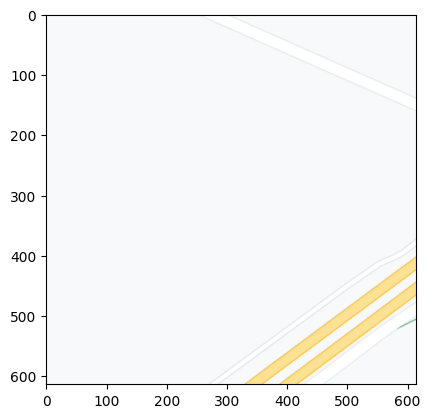

In [27]:
plt.imshow(test[0].permute(1,2,0));

In [6]:
data = read_image("../data/Paris_plan/000060_Paris_48.94739_2.42785.png")
# plt.imshow(data.permute(1,2,0));
data.shape

torch.Size([3, 512, 512])

In [7]:
pourcentage = 0.4
nouvelle_taille = int(data.size()[1] * pourcentage)
nouvelle_taille

204

In [8]:
test = transforms.Resize(nouvelle_taille)(data)

In [9]:
test.shape

torch.Size([3, 204, 204])

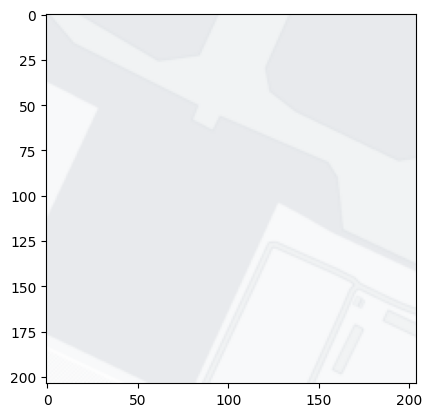

In [10]:
plt.imshow(test.permute(1,2,0));

# Import de toutes les images

In [11]:
# datasets.ImageFolder('/home/louishenri/code/TsaoTsao1/08-Projet/sat2plan/data/Paris_satellite')

## Traitement image

In [12]:
data.size()

torch.Size([3, 512, 512])

In [13]:
data_reshape = data.reshape((data.size()[1] * data.size()[2],data.size()[0]))
data_reshape

tensor([[232, 232, 232],
        [232, 232, 220],
        [241, 241, 241],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]], dtype=torch.uint8)

In [14]:
# decompte_couleur = len(np.unique(data_reshape,axis=0))
decompte_couleur = len(torch.unique(data_reshape,dim=0))
decompte_couleur

NameError: name 'torch' is not defined

# Compression

In [ ]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(data_reshape)

KMeans(n_clusters=10)

In [ ]:
kmeans.labels_

array([2, 6, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
kmeans.labels_.shape

(262144,)

In [ ]:
len(np.unique(kmeans.labels_,axis=0))
# len(torch.unique(kmeans.labels_))

10

In [ ]:
kmeans.cluster_centers_.shape

(10, 3)

In [ ]:
kmeans.cluster_centers_

array([[111.2536426 , 110.10711097, 107.77663073],
       [ 86.35362264,  86.00838258,  86.602981  ],
       [136.04015956, 136.52409574, 136.87324133],
       [148.80299887, 149.76952094, 149.22034138],
       [ 98.52495441,  98.09749836,  97.63776712],
       [205.98825655, 207.29057513, 205.82806384],
       [146.50054318, 118.68196632, 101.70450842],
       [122.30409779, 123.19757831, 123.36614264],
       [ 98.85878528, 106.81366952, 121.59530606],
       [169.18470935, 173.16406908, 169.7401011 ]])

## Compression

In [ ]:
data_compressed = kmeans.cluster_centers_[kmeans.labels_].astype(np.uint8)
data_compressed = torch.from_numpy(data_compressed)
data_compressed

tensor([[136, 136, 136],
        [146, 118, 101],
        [136, 136, 136],
        ...,
        [136, 136, 136],
        [136, 136, 136],
        [136, 136, 136]], dtype=torch.uint8)

In [ ]:
data_compressed.shape

torch.Size([262144, 3])

In [ ]:
data_compressed = data_compressed.astype(np.uint8)
data_compressed

AttributeError: 'Tensor' object has no attribute 'astype'

In [ ]:
data_compressed_reshape = data_compressed.reshape(3,512,512)
data_compressed_reshape

tensor([[[136, 136, 136,  ...,  97,  98, 106],
         [121, 136, 136,  ...,  86,  86, 122],
         [123, 123, 146,  ...,  86,  86,  86],
         ...,
         [136, 136, 136,  ..., 122, 123, 123],
         [136, 136, 136,  ..., 123, 122, 123],
         [123, 136, 136,  ..., 123, 123, 122]],

        [[123, 123, 122,  ...,  98, 106, 121],
         [122, 123, 123,  ...,  97,  98, 106],
         [121, 122, 123,  ...,  98,  97, 111],
         ...,
         [136, 136, 136,  ..., 123, 123, 136],
         [136, 136, 148,  ..., 122, 123, 123],
         [136, 136, 136,  ..., 123, 146, 118]],

        [[101, 111, 110,  ...,  86,  86,  98],
         [ 98,  97,  98,  ...,  86,  86,  86],
         [ 98, 106, 121,  ...,  86,  98, 106],
         ...,
         [148, 149, 149,  ..., 136, 148, 149],
         [149, 148, 149,  ..., 136, 136, 148],
         [149, 149, 148,  ..., 136, 136, 136]]], dtype=torch.uint8)

In [ ]:
data_compressed_reshape.shape

torch.Size([3, 512, 512])

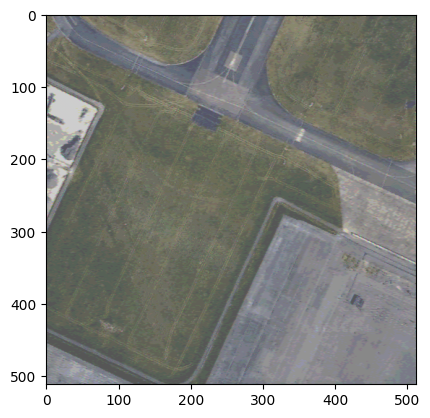

In [ ]:
plt.imshow(data_compressed_reshape.permute(1,2,0));

In [ ]:
decompte_couleur_2 = len(torch.unique(data_compressed_reshape,dim=0))
decompte_couleur_2

3

In [ ]:
pourcentage = 0.4
nouvelle_taille_2 = int(data_compressed_reshape.size()[1] * pourcentage)
nouvelle_taille_2

204

In [ ]:
test_2 = transforms.Resize(nouvelle_taille_2)(data)

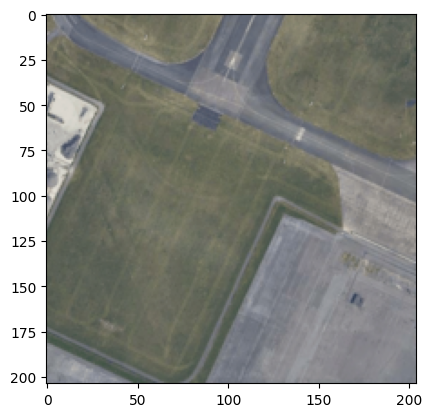

In [ ]:
plt.imshow(test_2.permute(1,2,0));